###Crop and Fertilizer Recommendation System using ML

In [1]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [63]:
#Loading the datasets

crop = pd.read_csv("DATASETS/Crop_recommendation.csv")

In [64]:
# starting 5 rows

crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [65]:
# last 5 rows

crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [66]:
# to check the number of rows and columns in dataset

crop.shape

(2200, 8)

In [67]:
# to get the information of th dataset

crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [68]:
#check missing values

crop.isnull()

,N,P,K,temperature,humidity,ph,rainfall,label
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2195,False,False,False,False,False,False,False,False
2196,False,False,False,False,False,False,False,False
2197,False,False,False,False,False,False,False,False
2198,False,False,False,False,False,False,False,False


In [69]:
# to get the sum of the missing values

crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [70]:
#check duplicated value in datasets

crop.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Length: 2200, dtype: bool

In [71]:
#to get the sum of the duplicated value in the dataset

crop.duplicated().sum()

np.int64(0)

In [72]:
# to check the statistics of the dataset

crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [73]:
#to view all the columns in the dataset

crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [74]:
#to check the targeted dirstribution in the dataset-Nitrogen(N)

crop['N'].value_counts()

N
22     44
40     44
27     42
39     41
31     41
       ..
132     2
46      1
135     1
139     1
130     1
Name: count, Length: 137, dtype: int64

In [75]:
#to check the targeted dirstribution in the dataset-Phosphorus(P)

crop['P'].value_counts()

P
60    56
58    48
56    46
55    44
57    42
      ..
83     2
90     2
82     2
84     1
93     1
Name: count, Length: 117, dtype: int64

In [76]:
#to check the targeted dirstribution in the dataset-Potassium(K)

crop['K'].value_counts()

K
17    90
22    87
15    86
20    80
25    78
      ..
83     8
5      8
13     7
7      5
80     4
Name: count, Length: 73, dtype: int64

In [77]:
#to check the targeted dirstribution in the dataset-(temperature)

crop['temperature'].value_counts()

temperature
23.603016    1
20.879744    1
21.770462    1
23.004459    1
26.491096    1
            ..
24.529227    1
20.775761    1
22.301574    1
21.446540    1
22.179319    1
Name: count, Length: 2200, dtype: int64

In [78]:
#to check the targeted dirstribution in the dataset-(humidity)

crop['humidity'].value_counts()

humidity
60.396475    1
82.002744    1
80.319644    1
82.320763    1
80.158363    1
            ..
80.544986    1
84.497744    1
80.644165    1
84.943760    1
80.331272    1
Name: count, Length: 2200, dtype: int64

In [79]:
#to check the targeted dirstribution in the dataset-(pH)

crop['ph'].value_counts()

ph
6.779833    1
6.502985    1
7.038096    1
7.840207    1
6.980401    1
           ..
7.070960    1
6.244841    1
6.043305    1
5.824709    1
6.357389    1
Name: count, Length: 2200, dtype: int64

In [80]:
#to check the targeted dirstribution in the dataset-(rainfall)

crop['rainfall'].value_counts()

rainfall
140.937041    1
202.935536    1
226.655537    1
263.964248    1
242.864034    1
             ..
260.263403    1
240.081065    1
197.979121    1
272.201720    1
200.088279    1
Name: count, Length: 2200, dtype: int64

In [81]:
#to check the targeted dirstribution in the dataset-(label)

crop['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [82]:
#to remove the column named label
features=crop.columns.to_list()
features.remove('label')
print(features)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


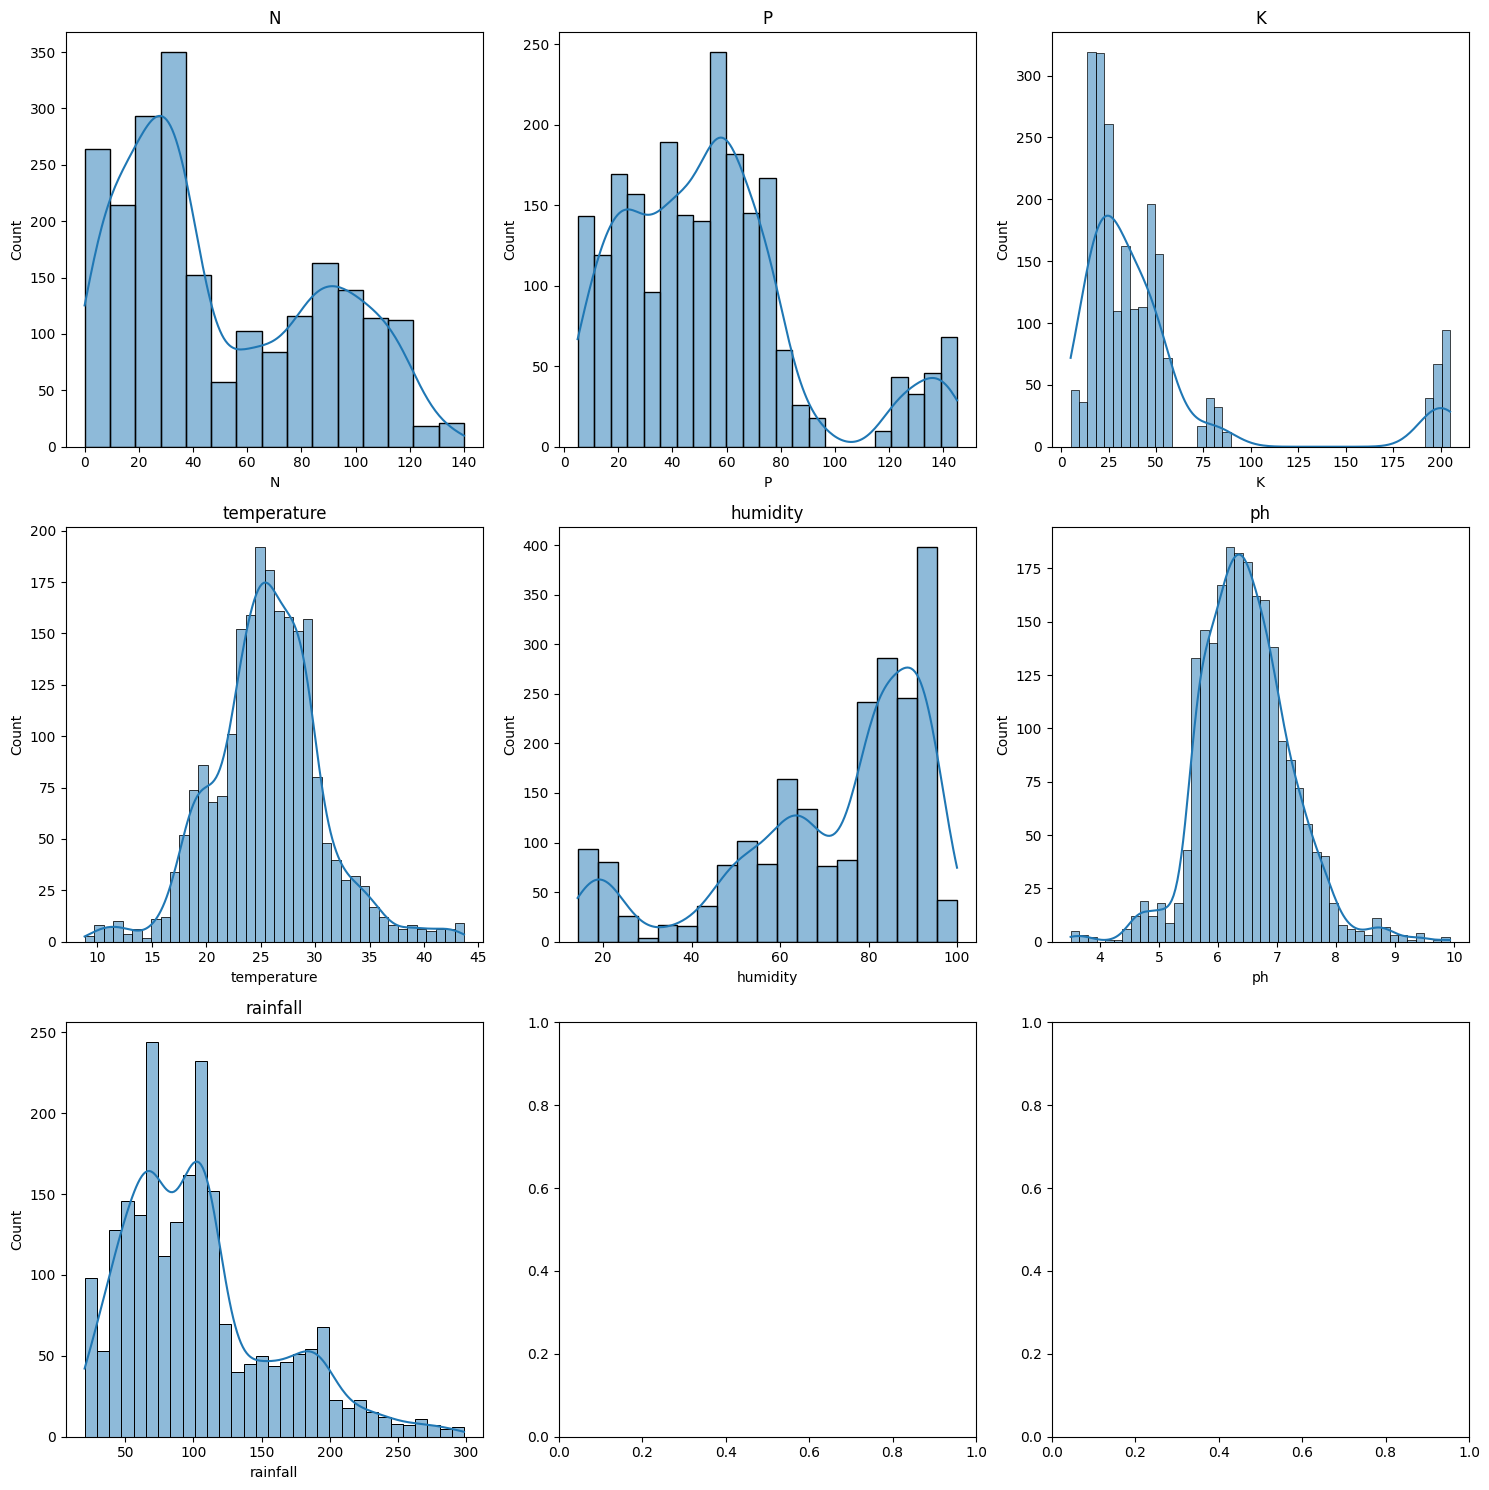

In [83]:
#Visualize the distribution of each feature
import seaborn as sns
fig, ax =plt.subplots(3,3,figsize=(15,15))
for i, subplot in zip(features,ax.flatten()):
    sns.histplot(crop[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

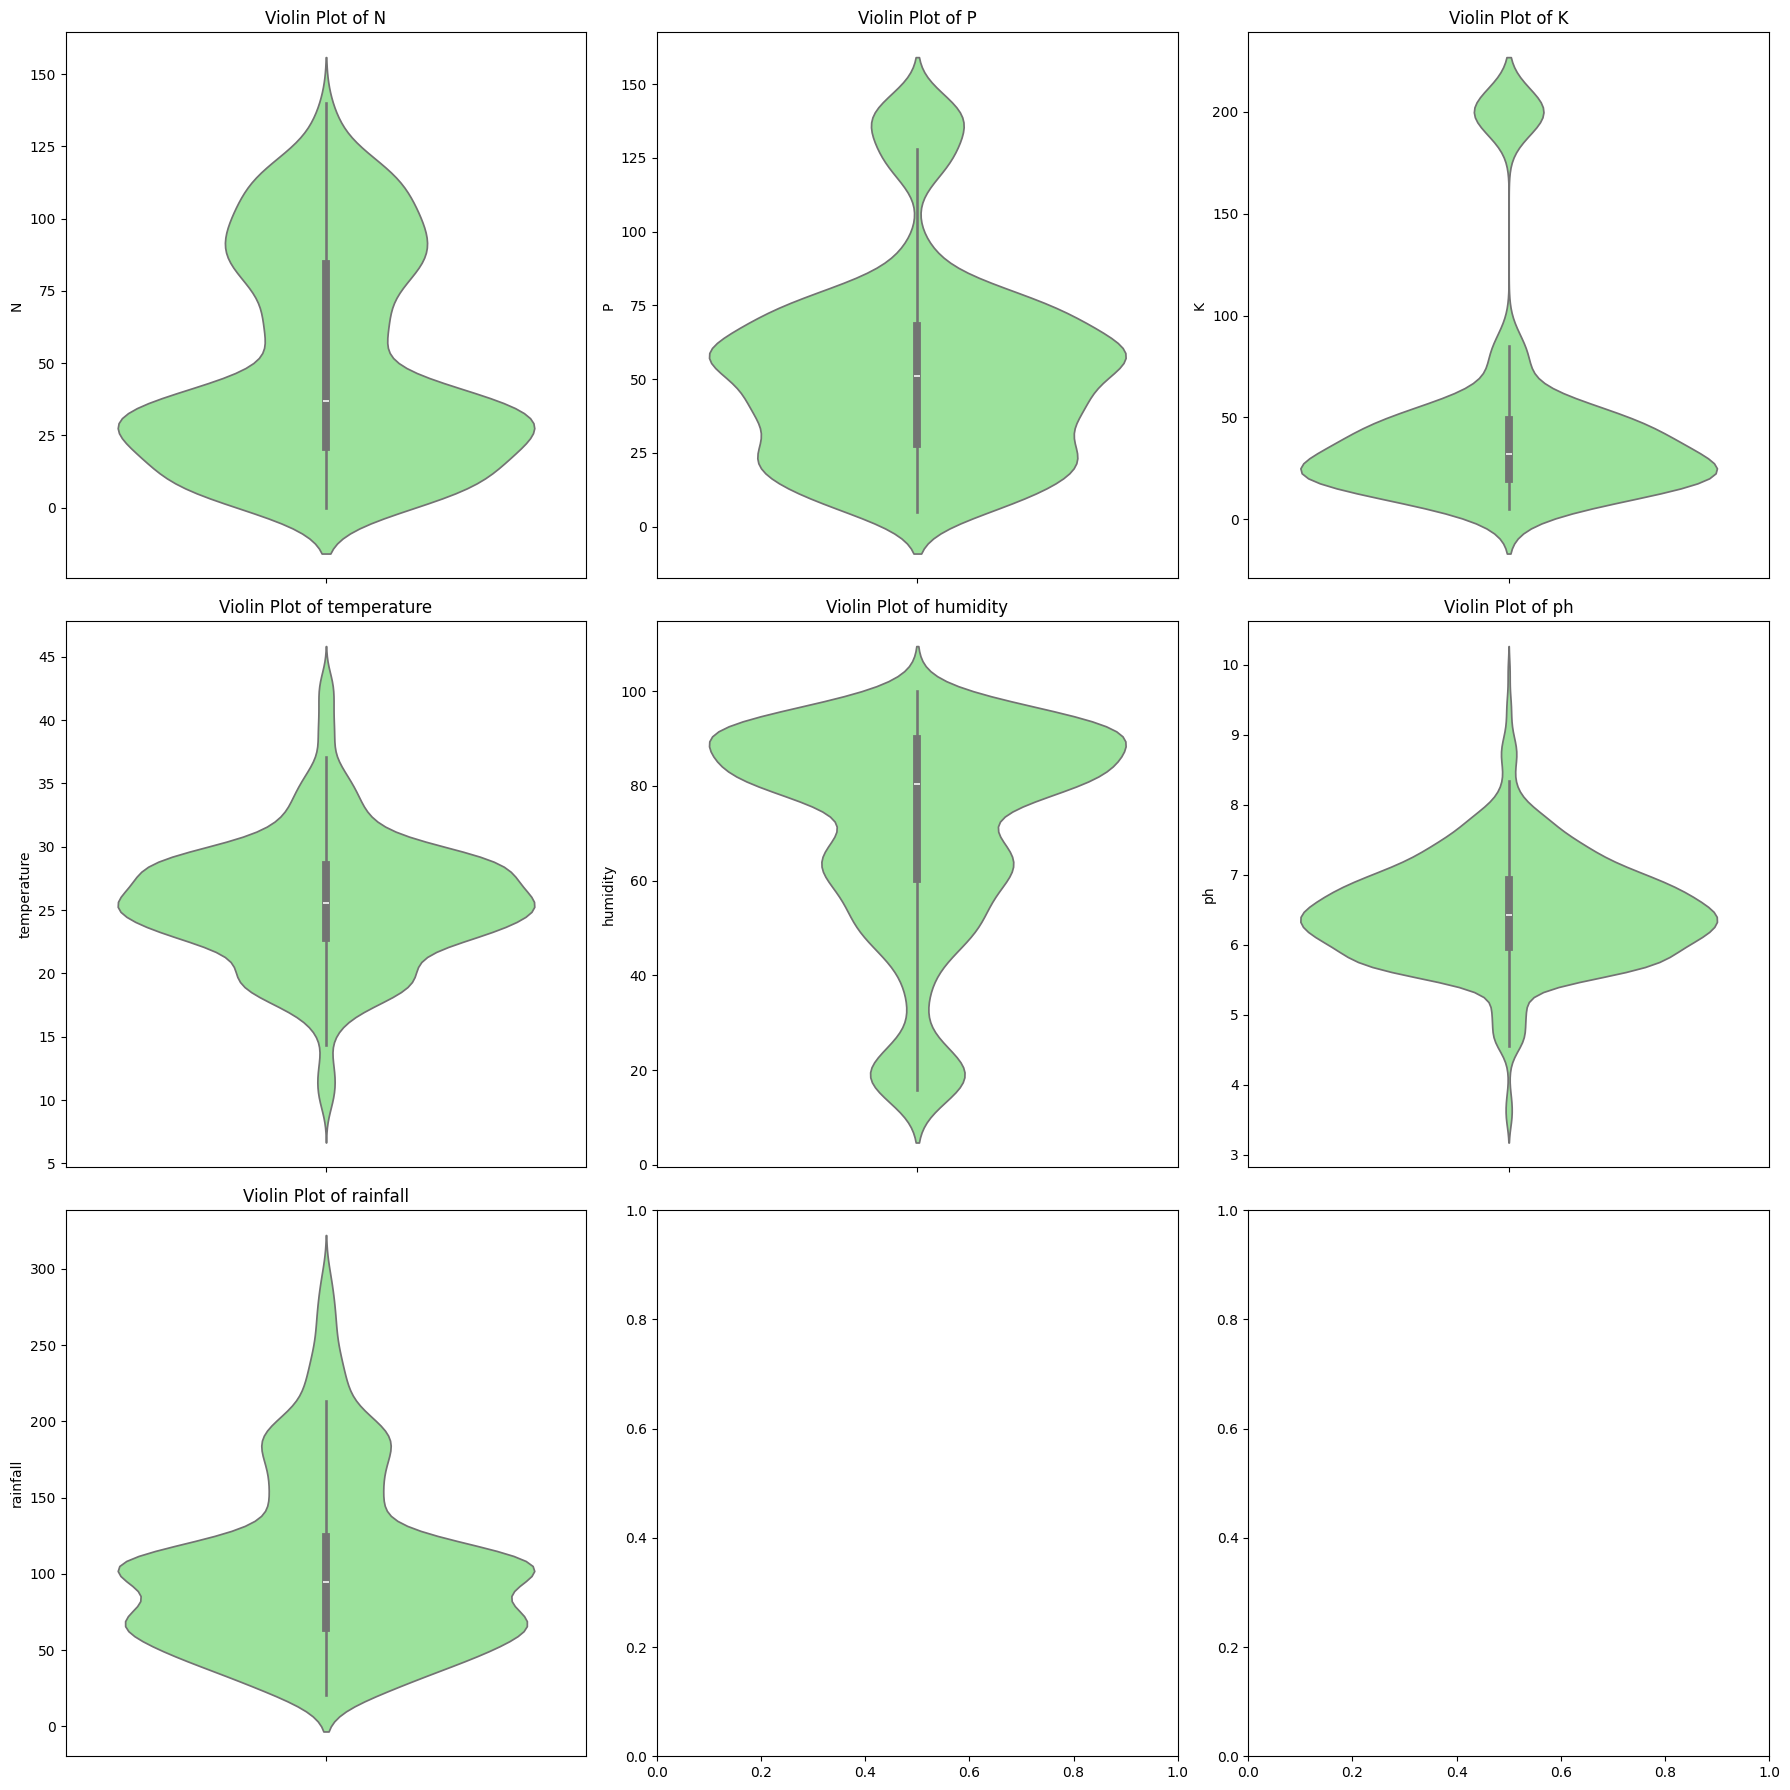

In [84]:
# Violin Plots (Combines KDE & Boxplot)default as inner="box"
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
for i, ax in zip(features, axes.flatten()):
    sns.violinplot(y=crop[i], ax=ax, color="lightgreen")
    ax.set_title(f"Violin Plot of {i}")

plt.tight_layout()
plt.show()

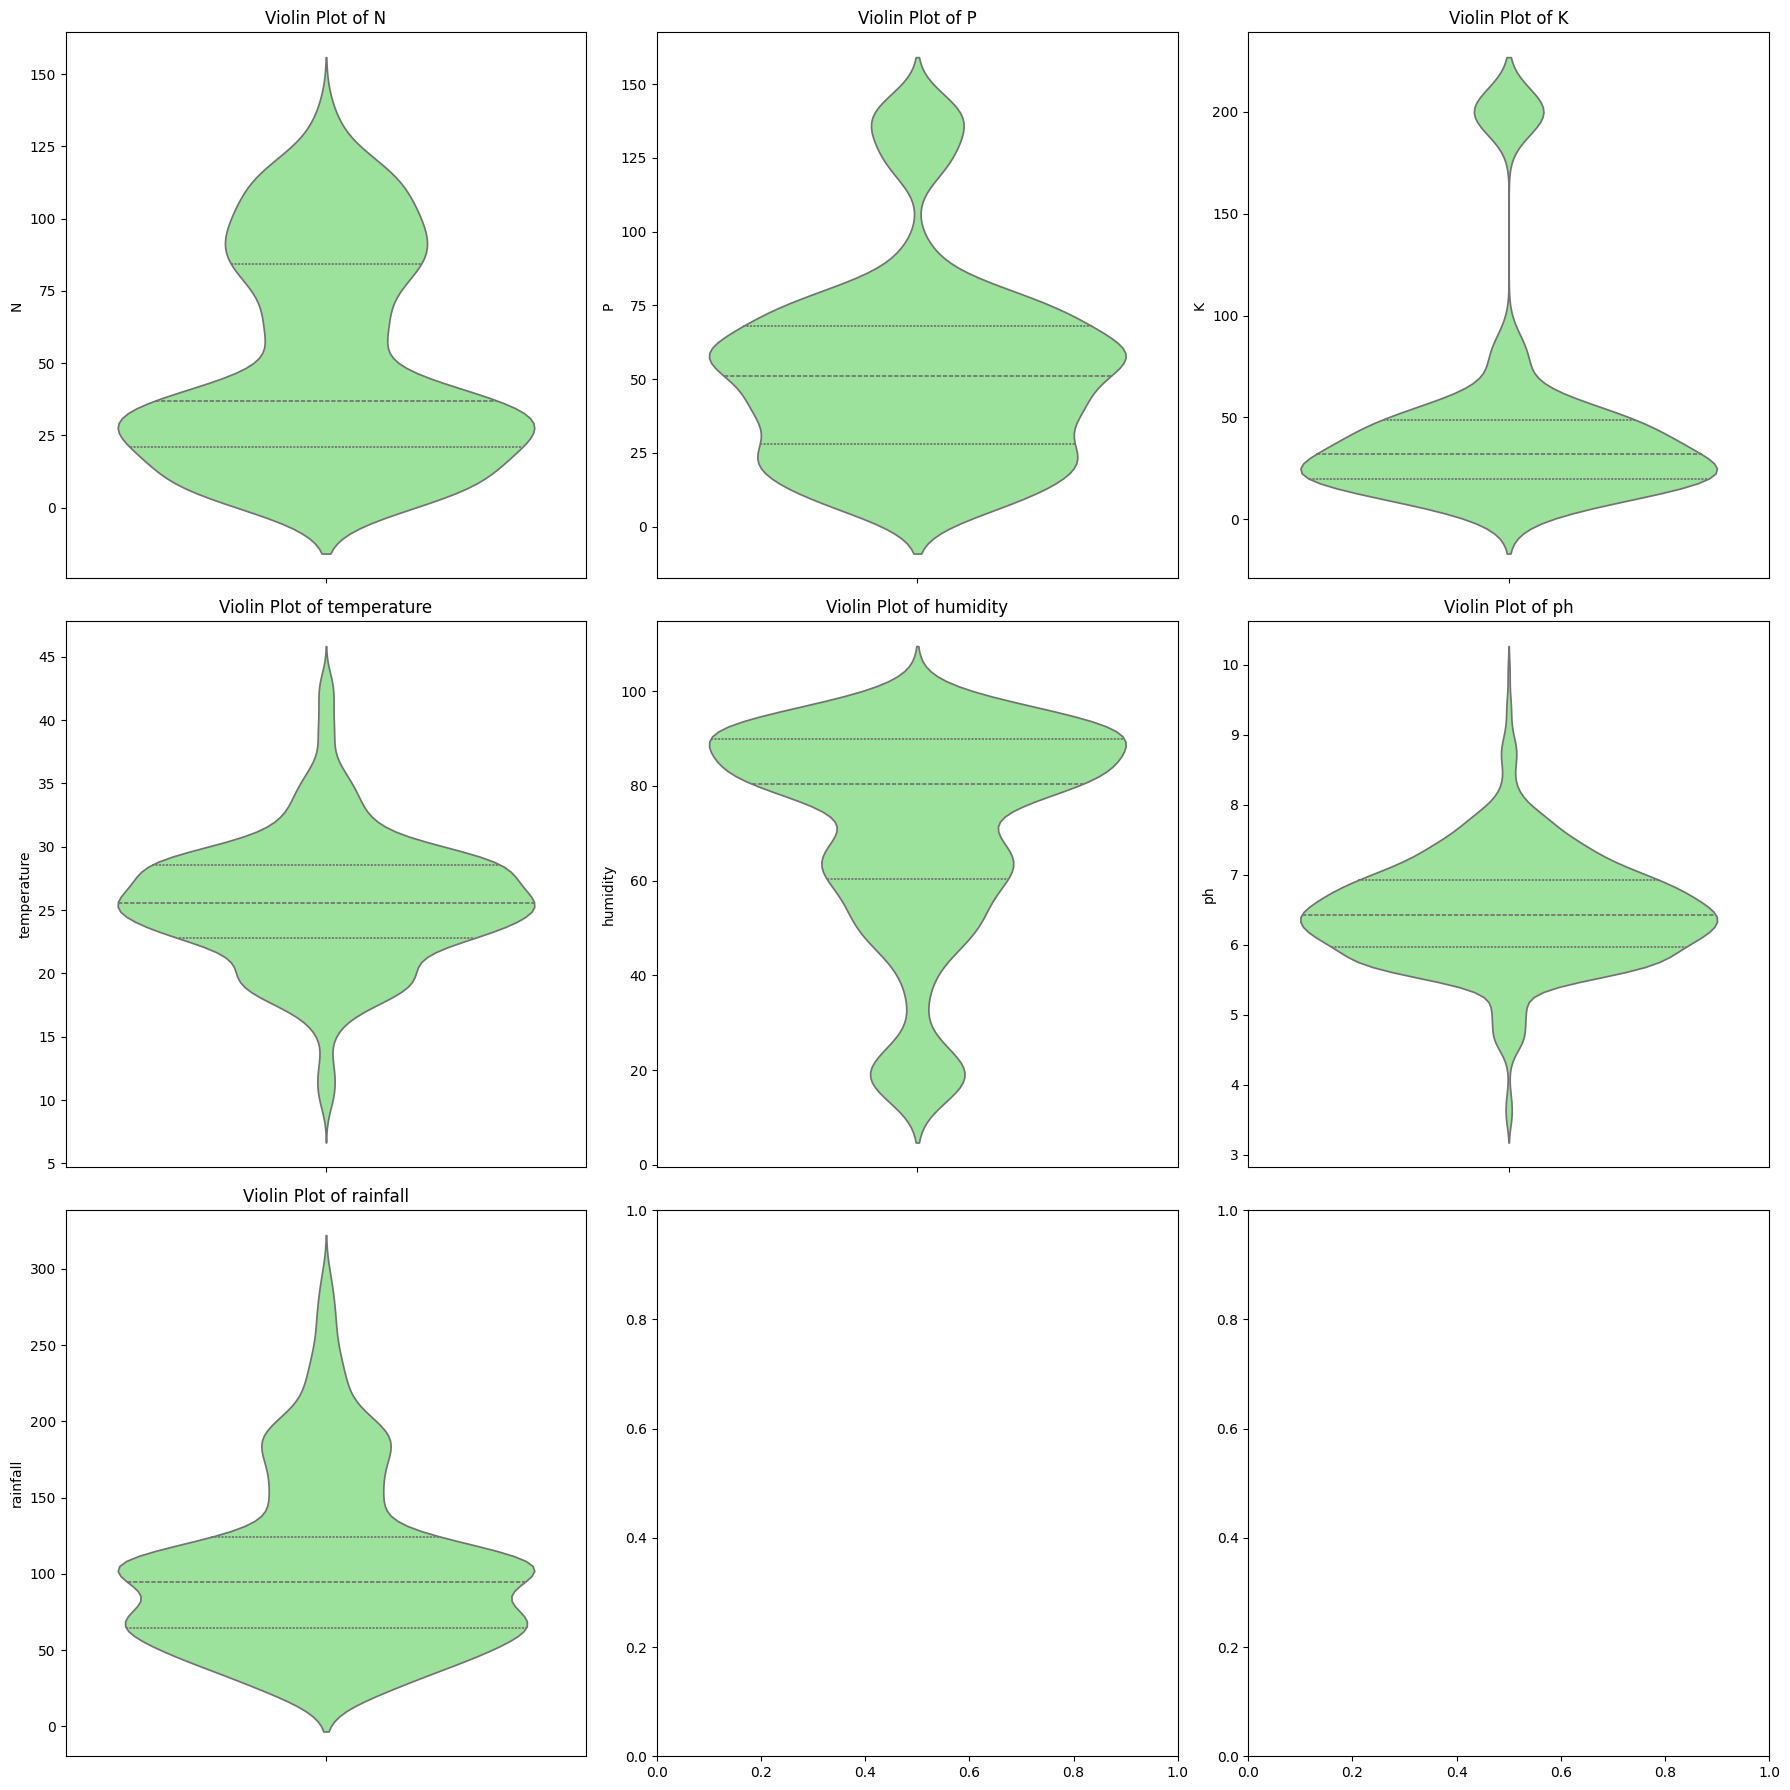

In [85]:

# Violin Plots (Combines KDE & Boxplot)
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
for i, ax in zip(features, axes.flatten()):
    sns.violinplot(y=crop[i], ax=ax,inner="quartile", color="lightgreen")
    ax.set_title(f"Violin Plot of {i}")

plt.tight_layout()
plt.show()

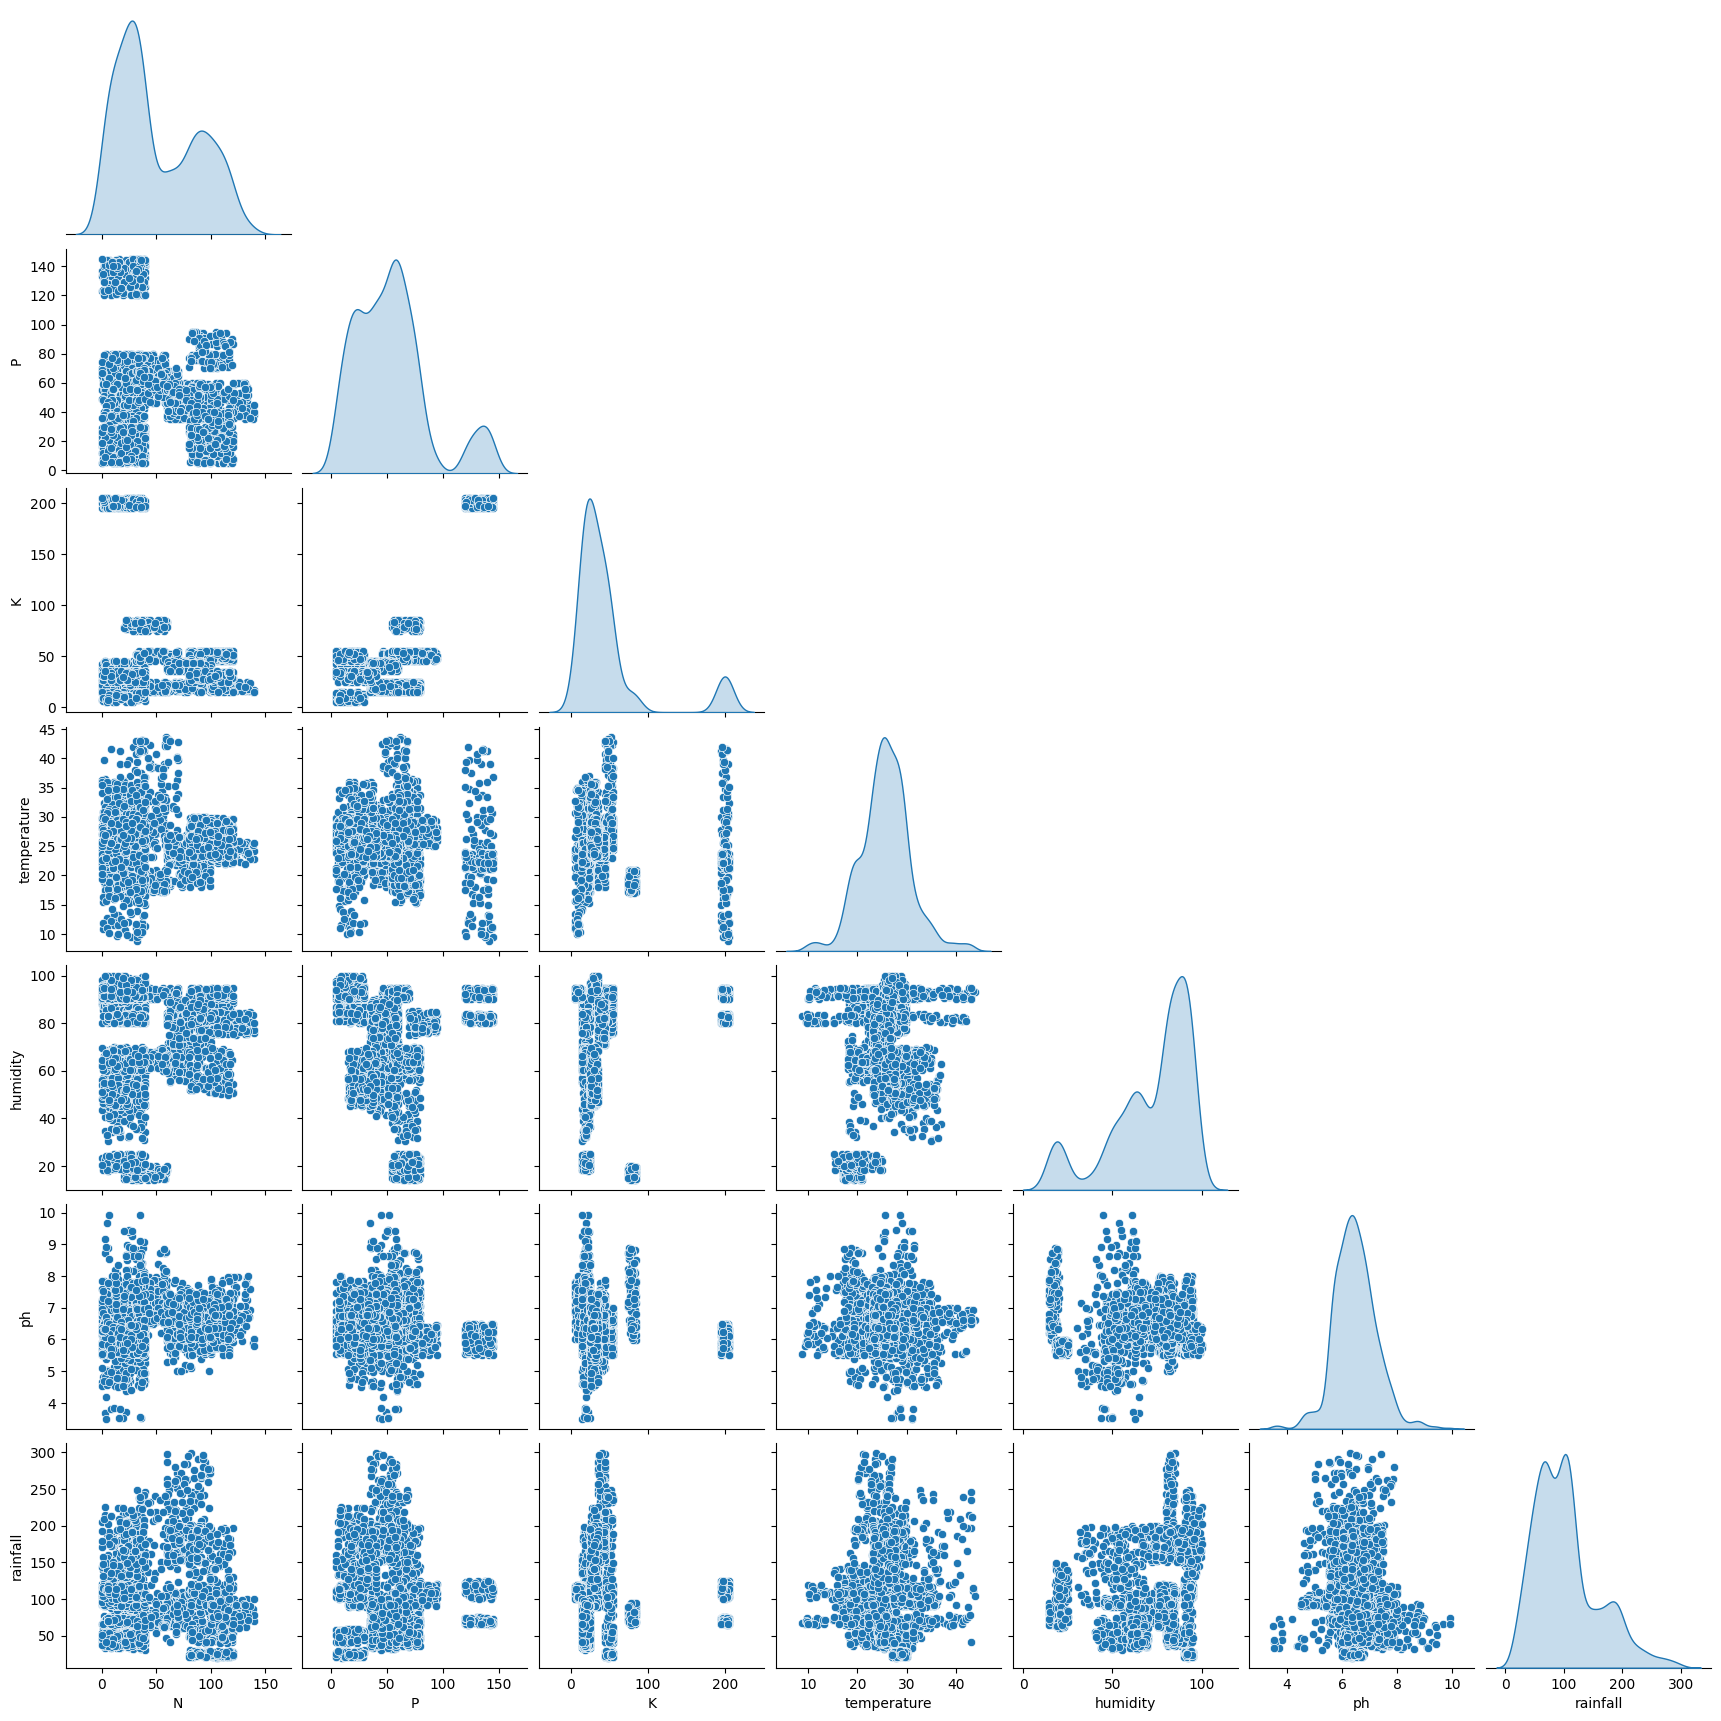

In [86]:
# Pairplot (Relationships between Features)
sns.pairplot(crop, diag_kind="kde", corner=True)
plt.show()

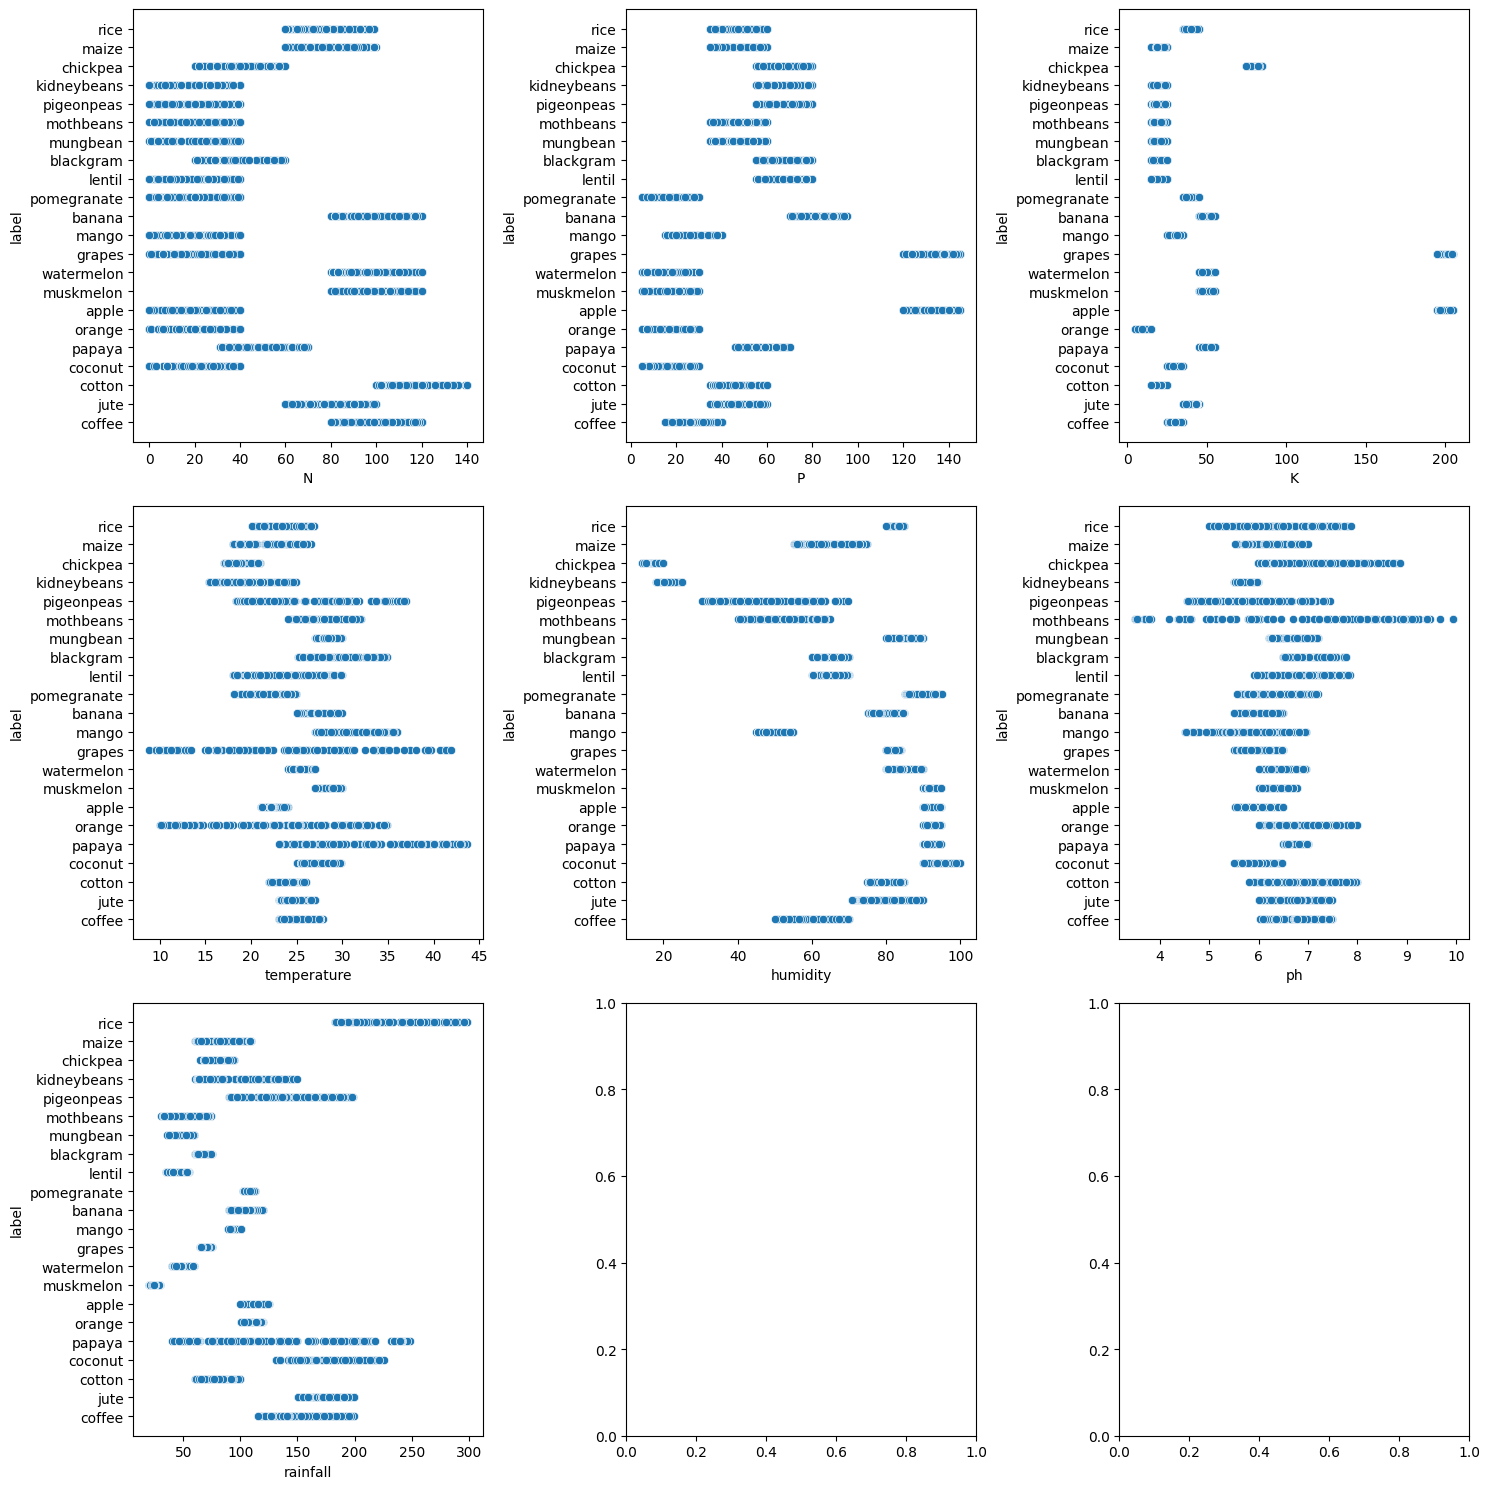

In [87]:
# Plotting a Scatter plot
fig, ax = plt.subplots(3, 3, figsize=(15,15))
for i, subplots in zip(features,ax.flatten()):
    sns.scatterplot(x=i, y='label', data=crop, ax=subplots)
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13680\2002268194.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crop, x="label", y="temperature", palette="winter")


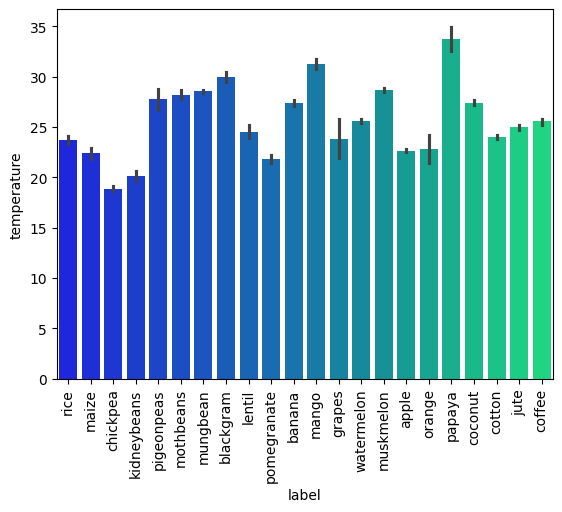

In [88]:
#to plot a bar graph between temprature and crop
sns.barplot(data=crop, x="label", y="temperature", palette="winter")
plt.xticks(rotation=90)
plt.show()

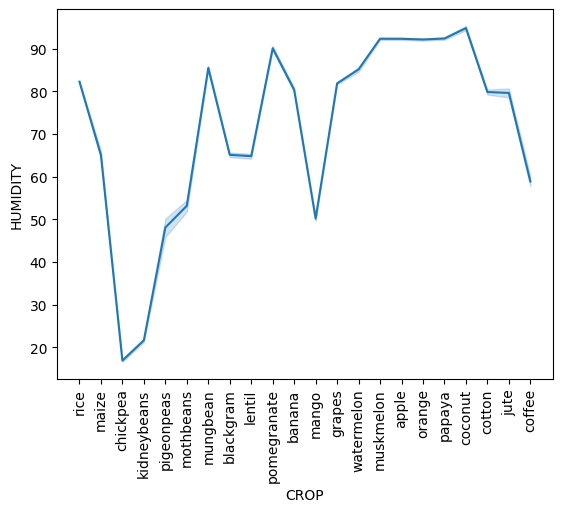

In [89]:
#to plot a line chart
sns.lineplot(data=crop, x="label", y="humidity")
plt.xticks(rotation=90)
plt.xlabel("CROP")
plt.ylabel("HUMIDITY")
plt.show()


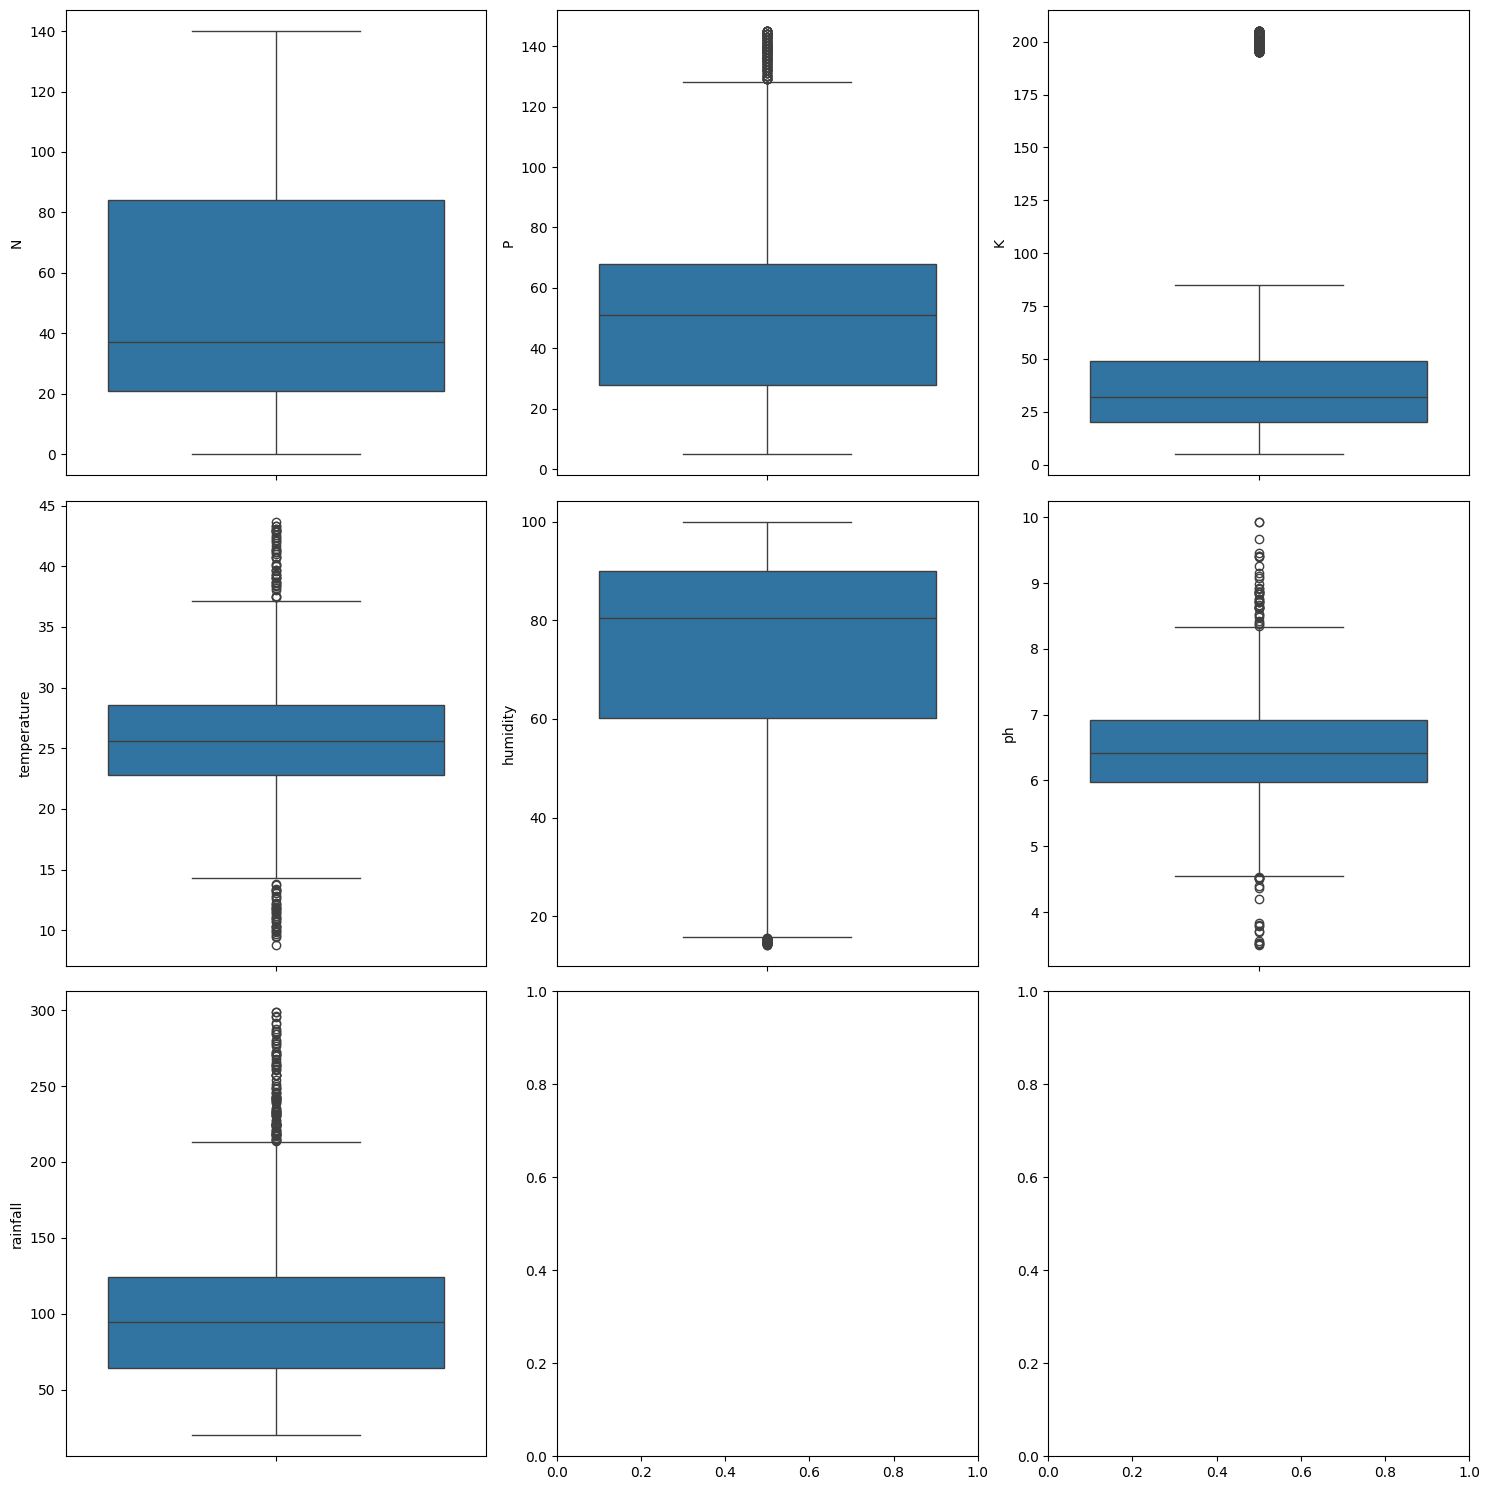

In [90]:
#to find outliners by boxplot
fig, ax = plt.subplots(3,3, figsize=(15,15))
 
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(crop[i], ax=subplot)
 
plt.tight_layout()
plt.show()

In [91]:
# Correlation of the features
num_cols = crop.select_dtypes(include=[np.number])
num_cols

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [92]:
corr = num_cols.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


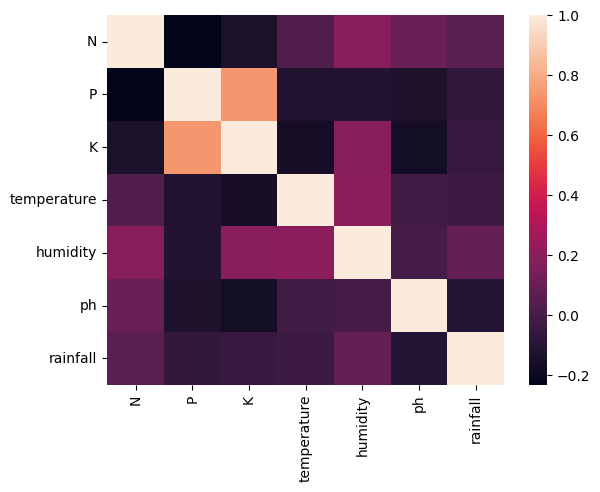

In [93]:
# Visualizing with Heatmap
sns.heatmap(corr)
plt.show()

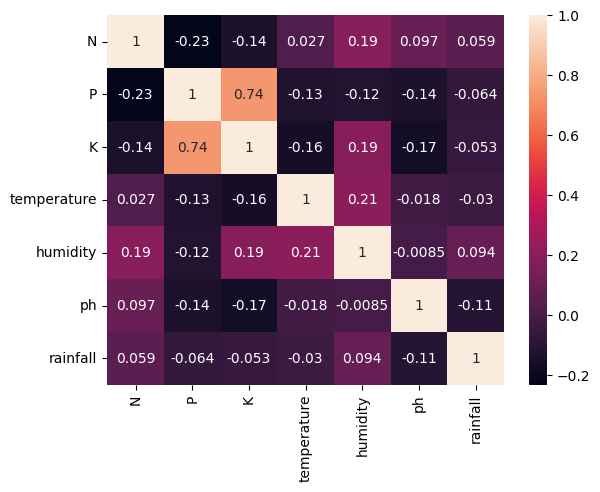

In [94]:
# Visualizing with Heatmap(with true values of annot)
sns.heatmap(corr, annot=True)
plt.show()

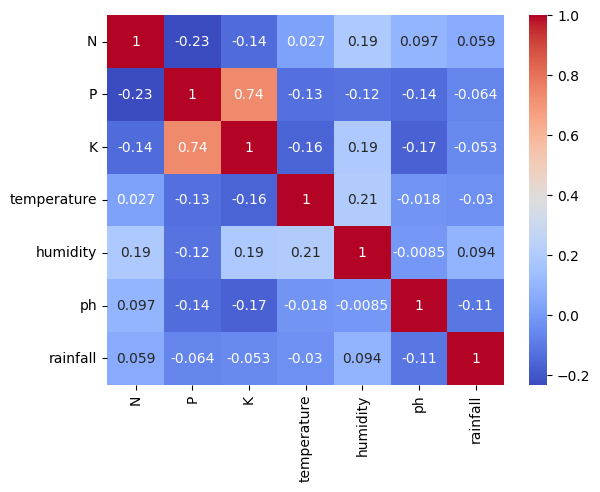

In [95]:
# Visualizing with Heatmap(with true values of annot alongwith coolwarm colours)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

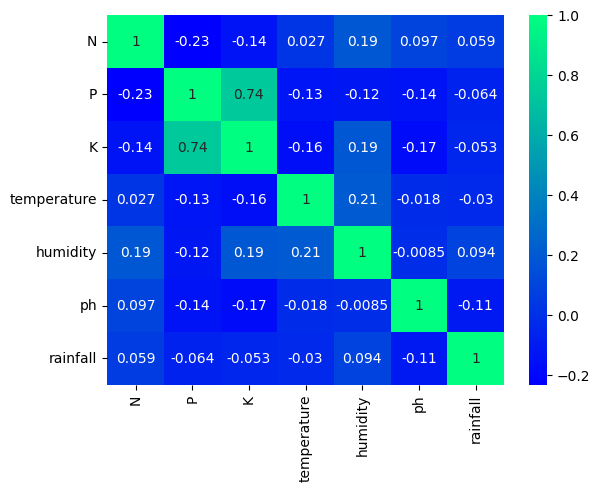

In [96]:
# Visualizing with Heatmap(with winter colour theme which consists of Blue-Green Gradient)
sns.heatmap(corr, annot=True, cmap='winter')
plt.show()

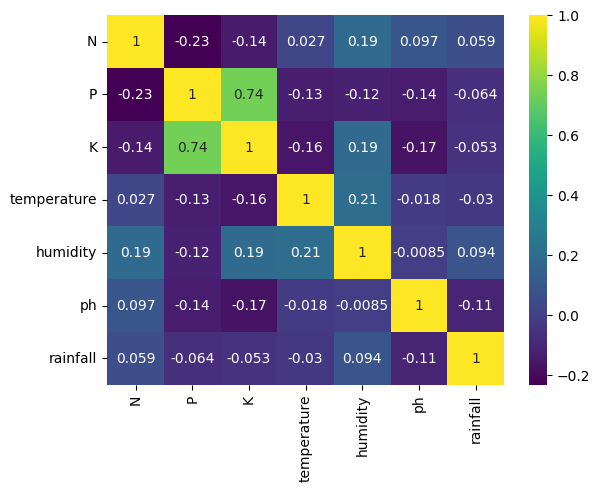

In [97]:
# Visualizing with Heatmap(cmap=viridis,this is used for uniform colourmap)this heatmap is good for colourblind users...
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

### ENCODING

In [98]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [99]:
crop_dict = {'rice': 1,'maize': 2,'chickpea': 3,'kidneybeans': 4,'mungbean': 5,'blackgram': 6,'lentil': 7,'pomegranate': 8,'banana': 9,'mango': 10,'grapes': 11,'watermelon': 12,'muskmelon': 13,'apple': 14,'orange': 15,'papaya': 16,'coconut': 17,'cotton': 18,'jute': 19,'coffee': 20}

In [100]:
crop['crop_no'] = crop['label'].map(crop_dict)
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1.0


In [101]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,20.0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,20.0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,20.0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,20.0
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,20.0


In [ ]:
#command to drop any column
#whole code is commented because i dont want to drop label colunm for now
#crop.drop('label', axis=1, inplace=True)
#crop.tail()